# State Farm: Agricultural Data Analysis

**Leng Yang**

**Last Updated: 2/6/25**

## Assignment

Project Source: https://platform.stratascratch.com/data-projects/agricultural-data-analysis

The objective of this project is to provide actionable insights into optimal crop selection by analyzing environmental and soil factors. This will involve an exploration of how various crops respond to specific conditions, such as soil nutrient content, climatic factors like temperature and humidity, and rainfall patterns.

**Tasks**

1. Create Data Visualizations:
* Plot the distributions of each soil nutrient (N, P, K) and compare them across different crop types to identify any patterns.
* Generate scatter plots to visualize the relationship between temperature, humidity, pH, and rainfall with crop type to detect dependencies.
* Craft heatmaps to show correlations between all numerical factors, helping to pinpoint interdependencies.

2. Perform Statistical Analysis:
* Execute ANOVA tests to examine whether means of different environmental factors (like humidity, temperature, and rainfall) are significantly different across various crop types.
* Use regression models to assess the influence of environmental and soil factors on crop yield and type.
* Interpret the p-values from your statistical tests to determine significance levels, and use this to draw conclusions about the factors that are most predictive of crop type.

## Data Description

The dataset is a comprehensive collection of data points relevant to Indian agriculture, focusing on:

* `N (Nitrogen)`: Nitrogen content in the soil.
* `P (Phosphorus)`: Phosphorus levels.
* `K (Potassium)`: Potassium amount.
* `Temperature`: Measured in degrees Celsius.
* `Humidity`: Percentage of relative humidity.
* `pH`: Indicates soil acidity or alkalinity.
* `Rainfall`: Rainfall amount in millimeters.
* `label`: Type of crop.

<BR><BR>

### Data Exploration

In [7]:
#Load in necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
#Load in data
df = pd.read_csv('./datasets/Crop_recommendation.csv')

In [9]:
#View information on data, including any missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
#Statistical distribution of features
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<BR>

**Plot the distributions of each soil nutrient (N, P, K) and compare them across different crop types to identify any patterns.**

* Most crops grow in low to moderate levels of nitrogen.
* Most crops grow in low to moderate levels of phosphorus.
* Most crops grow in low levels of potassium.
* Apples and grapes require the highest levels of both phosphorus and potassium amongst the given crops.

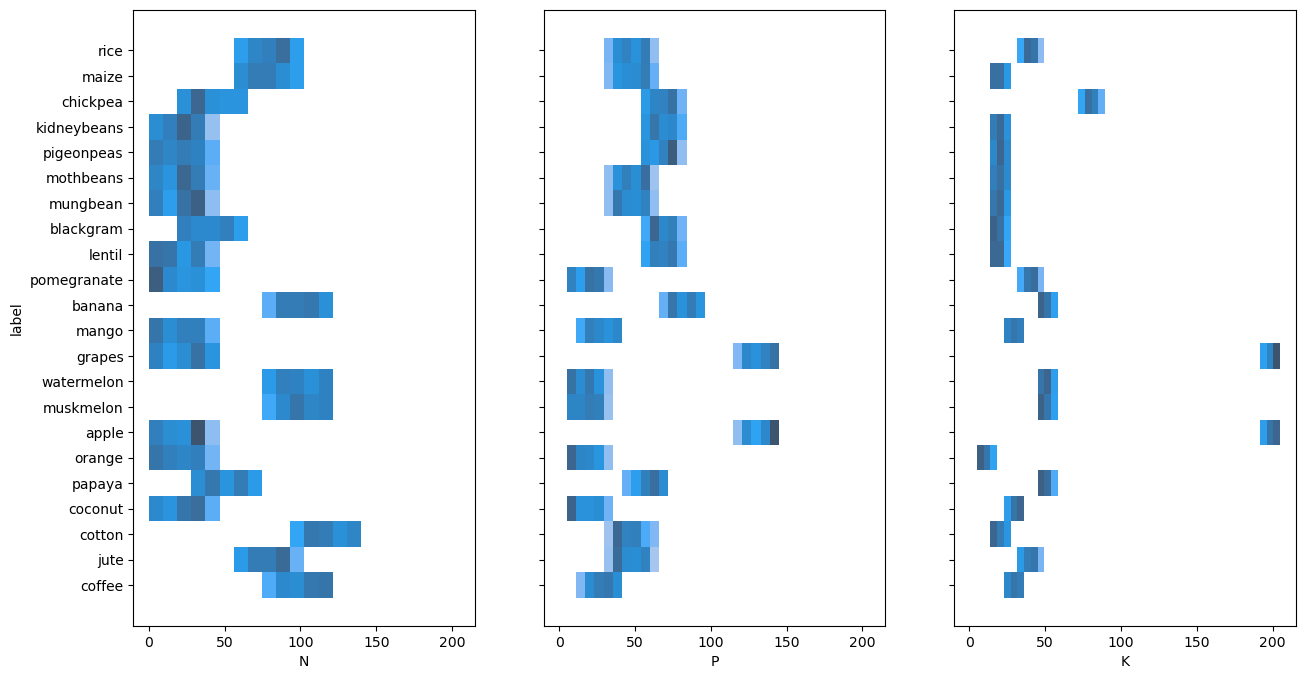

In [13]:
#Distribution of N,P, and K levels for each type of crop
fig, axes = plt.subplots(1, 3, figsize=[15,8], sharex=True, sharey=True)
sns.histplot(data=df, x='N', y='label', ax=axes[0])
sns.histplot(data=df, x='P', y='label', ax=axes[1])
sns.histplot(data=df, x='K', y='label', ax=axes[2]);

**Generate scatter plots to visualize the relationship between temperature, humidity, pH, and rainfall with crop type to detect dependencies.**
* Temperature is normally distributed. This indicates that different crops are able to grow across a wide range of temperatures, with most hovering around room temperature.
* Humidity is left-skewed. This indicates most crops prefer higher levels of humidity to grow.
* pH levels are normally distributed. Most crops prefer to grow between a pH level of 6-8.
* Rainfall distribution is right-skewed. Most crops prefer a moderate level of rainfall, with some preferring larger volumes.

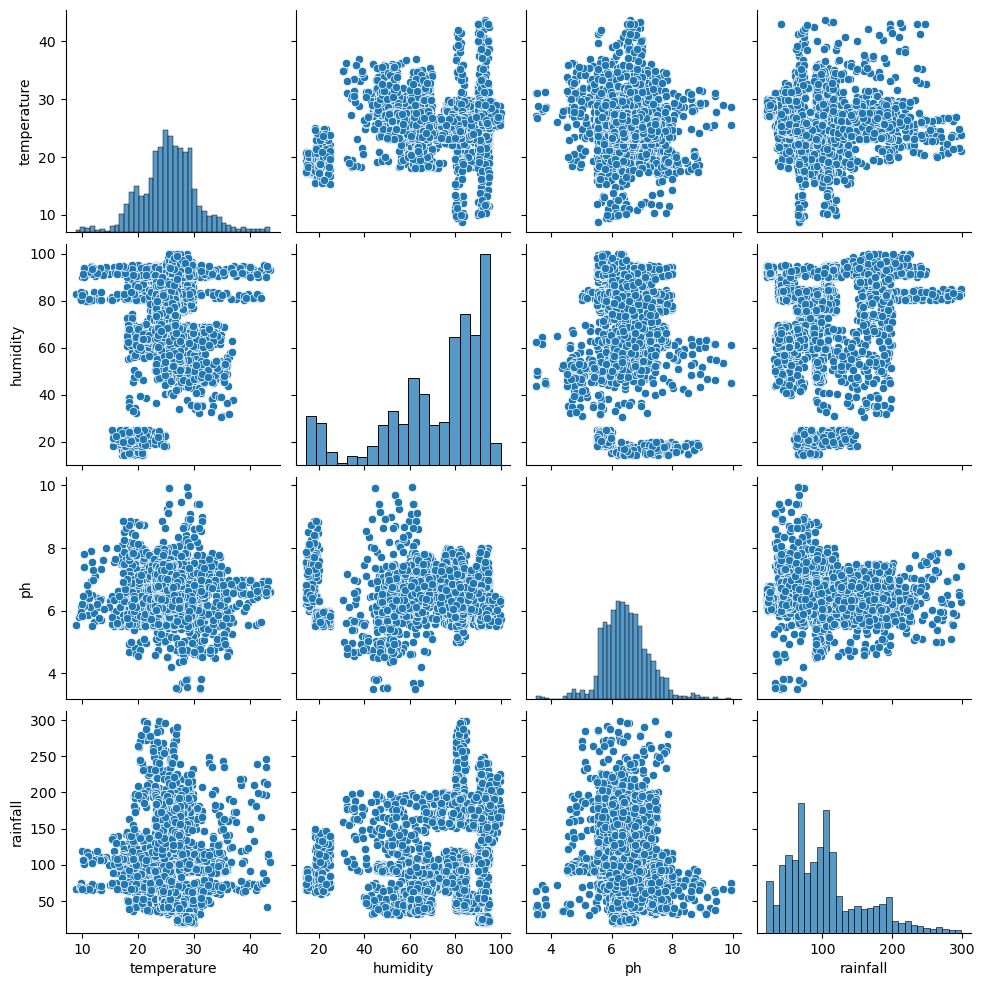

In [15]:
sns.pairplot(data=df[['temperature','humidity','ph','rainfall']]);

**Craft heatmaps to show correlations between all numerical factors, helping to pinpoint interdependencies.**
* Phosphorus and potassium are strongly positively correlated. Soil high in levels of potassium may also have higher levels of phosphorus.
* Humidity is somewhat correlated with temperature, nitrogren, and potassium.

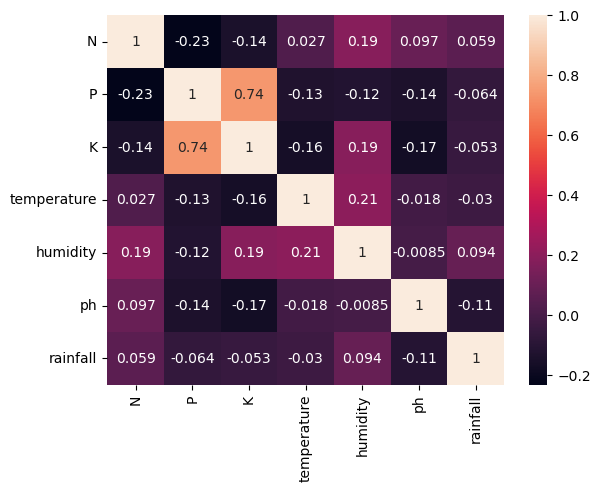

In [17]:
sns.heatmap(df.drop(columns='label').corr(), annot=True);

<BR>

2. Perform Statistical Analysis:
* Execute ANOVA tests to examine whether means of different environmental factors (like humidity, temperature, and rainfall) are significantly different across various crop types.
* Use regression models to assess the influence of environmental and soil factors on crop yield and type.
* Interpret the p-values from your statistical tests to determine significance levels, and use this to draw conclusions about the factors that are most predictive of crop type.

* **Humidity**

In [21]:
#Obtain list of crop labels
labels = df.label.unique()
#Obtain list containing lists of humidities for each crop
crop_humidities = [df.loc[df.label == crop, 'humidity'] for crop in labels]
#Compute one-way ANOVA test
stats.f_oneway(*crop_humidities)

F_onewayResult(statistic=3103.708891217461, pvalue=0.0)

The F-statistic is `3103.71` with a p-value of `0.0`. The p-value falls below a significance level of 0.05, thus the null hypothesis can be rejected.

The results indicate that there exists a difference in average humidity levels across crop types. This indicates the importance of humidity as a factor in crop selection.

* **Temperature**

In [24]:
#Obtain list of crop labels
labels = df.label.unique()
#Obtain list containing lists of temperatures for each crop
crop_temps = [df.loc[df.label == crop, 'temperature'] for crop in labels]
#Compute one-way ANOVA test
stats.f_oneway(*crop_temps)

F_onewayResult(statistic=102.18698122995393, pvalue=4.019323818173197e-305)

The F-statistic is `102.19` with a p-value of `0.00`. The p-value falls below a significance level of 0.05, thus the null hypothesis can be rejected.

The results indicate that there exists a difference in average temperature levels across crop types. This indicates the importance of temperature as a factor in crop selection.

* **Rainfall**

In [41]:
#Obtain list of crop labels
labels = df.label.unique()
#Obtain list containing lists of rainfall for each crop
crop_rainfall = [df.loc[df.label == crop, 'rainfall'] for crop in labels]
#Compute one-way ANOVA test
stats.f_oneway(*crop_rainfall)

F_onewayResult(statistic=605.5279661441423, pvalue=0.0)

The F-statistic is `605.53` with a p-value of `0.0`. The p-value falls below a significance level of 0.05, thus the null hypothesis can be rejected.

The results indicate that there exists a difference in average rainfall levels across crop types. This indicates the importance of rainfall as a factor in crop selection.

<BR>

### Insights and Recommendations

**Insights**
* The ANOVA test determined statistical significance of the different values of `temperature`, `humidity`, and `rainfall` across the different crop types.

**Recommendations**
* **Environmental Factors**: It is strongly advised to take into consideration these environmental factors when considering crop selection and cultivation.
* **Future Studies**: Further studies could be conducted on how these factors interact to gain a deeper and more nuanced understanding.